## Notebook 8: 

This is an IPython notebook. Most of the code is composed of bash scripts, indicated by %%bash at the top of the cell, otherwise it is IPython code. This notebook includes code to download, assemble and analyze a published RADseq data set.

In [2]:
### Notebook 8
### Data set 8: Barnacles
### Authors: Herrera et al. 2015
### Data Location: SRP051026

## Download the sequence data
Sequence data for this study are archived on the NCBI sequence read archive (SRA). Below I read in SraRunTable.txt for this project which contains all of the information we need to download the data. 

+ Project SRA: SRP051026 
+ BioProject ID: PRJNA269631
+ SRA link: http://trace.ncbi.nlm.nih.gov/Traces/study/?acc=SRP051026

In [1]:
%%bash
## make a new directory for this analysis
mkdir -p empirical_8/fastq/

#### For each ERS (individuals) get all of the ERR (sequence file accessions).

In [3]:
## IPython code
import pandas as pd
import numpy as np
import urllib2
import os

## open the SRA run table from github url
url = "https://raw.githubusercontent.com/"+\
      "dereneaton/RADmissing/master/empirical_8_SraRunTable.txt"
intable = urllib2.urlopen(url)
indata = pd.read_table(intable, sep="\t")

## print first few rows
print indata.head()

    BioSample_s  MBases_l  MBytes_l                   Organism_s  \
0  SAMN03256053        39        32    Ashinkailepas seepiophila   
1  SAMN03256054        87        72  Ashinkailepas kermadecensis   
2  SAMN03256055        17        14             Leucolepas longa   
3  SAMN03256056        78        65        Neobrachylepas relica   
4  SAMN03256057         7         6         Neolepas sp. SH-2014   

  ReleaseDate_s       Run_s SRA_Sample_s Sample_Name_s    collected_by_s  \
0  Dec 10, 2014  SRR1702480    SRS785645         AsOK3  HOV Shinkai 2000   
1  Dec 11, 2014  SRR1702481    SRS785647        AsNiN2    ROV Quest 4000   
2  Dec 11, 2014  SRR1702482    SRS785649         VuTO2       HROV Nereus   
3  Dec 11, 2014  SRR1702484    SRS785650         bar06       ROV Jason 2   
4  Dec 11, 2014  SRR1702485    SRS785651         NeIn2  HOV Shinkai 6500   

   collection_date_s    ...     Platform_s SRA_Study_s         breed_s  \
0               1997    ...       ILLUMINA   SRP051026  not 

In [5]:
def wget_download(SRR, outdir, outname):
    """ Python function to get sra data from ncbi and write to
    outdir with a new name using bash call wget """
    
    ## get output name
    output = os.path.join(outdir, outname+".sra")
    
    ## create a call string 
    call = "wget -q -r -nH --cut-dirs=9 -O "+output+" "+\
           "ftp://ftp-trace.ncbi.nlm.nih.gov/"+\
           "sra/sra-instant/reads/ByRun/sra/SRR/"+\
           "{}/{}/{}.sra;".format(SRR[:6], SRR, SRR)
        
    ## call bash script
    ! $call 

Here we pass the SRR number and the sample name to the `wget_download` function so that the files are saved with their sample names. 

In [6]:
for ID, SRR in zip(indata.Sample_Name_s, indata.Run_s):
    wget_download(SRR, "empirical_8/fastq/", ID)

In [7]:
%%bash
## convert sra files to fastq using fastq-dump tool
## output as gzipped into the fastq directory
fastq-dump --gzip -O empirical_8/fastq/ empirical_8/fastq/*.sra

## remove .sra files
rm empirical_8/fastq/*.sra

Read 1012150 spots for empirical_8/fastq/166_40.sra
Written 1012150 spots for empirical_8/fastq/166_40.sra
Read 1581225 spots for empirical_8/fastq/72638_22.sra
Written 1581225 spots for empirical_8/fastq/72638_22.sra
Read 2024006 spots for empirical_8/fastq/82121_15.sra
Written 2024006 spots for empirical_8/fastq/82121_15.sra
Read 1020530 spots for empirical_8/fastq/AsNiN2.sra
Written 1020530 spots for empirical_8/fastq/AsNiN2.sra
Read 458811 spots for empirical_8/fastq/AsOK3.sra
Written 458811 spots for empirical_8/fastq/AsOK3.sra
Read 909109 spots for empirical_8/fastq/bar06.sra
Written 909109 spots for empirical_8/fastq/bar06.sra
Read 570988 spots for empirical_8/fastq/bar22.sra
Written 570988 spots for empirical_8/fastq/bar22.sra
Read 898436 spots for empirical_8/fastq/barJC6731B1_1.sra
Written 898436 spots for empirical_8/fastq/barJC6731B1_1.sra
Read 84629 spots for empirical_8/fastq/NeIn2.sra
Written 84629 spots for empirical_8/fastq/NeIn2.sra
Read 77842 spots for empirical_8/fa

In [9]:
%%bash
ls -lh empirical_8/fastq/

total 724M
-rw-rw-r-- 1 deren deren  75M Nov 24 12:49 166_40.fastq.gz
-rw-rw-r-- 1 deren deren 117M Nov 24 12:49 72638_22.fastq.gz
-rw-rw-r-- 1 deren deren 151M Nov 24 12:49 82121_15.fastq.gz
-rw-rw-r-- 1 deren deren  75M Nov 24 12:49 AsNiN2.fastq.gz
-rw-rw-r-- 1 deren deren  34M Nov 24 12:49 AsOK3.fastq.gz
-rw-rw-r-- 1 deren deren  67M Nov 24 12:49 bar06.fastq.gz
-rw-rw-r-- 1 deren deren  42M Nov 24 12:49 bar22.fastq.gz
-rw-rw-r-- 1 deren deren  66M Nov 24 12:49 barJC6731B1_1.fastq.gz
-rw-rw-r-- 1 deren deren 6.3M Nov 24 12:49 NeIn2.fastq.gz
-rw-rw-r-- 1 deren deren 5.8M Nov 24 12:49 NeOg1.fastq.gz
-rw-rw-r-- 1 deren deren  11M Nov 24 12:49 SEPR_3.fastq.gz
-rw-rw-r-- 1 deren deren  63M Nov 24 12:49 VuMaU1.fastq.gz
-rw-rw-r-- 1 deren deren  15M Nov 24 12:49 VuTO2.fastq.gz


## Make a params file

In [10]:
%%bash
pyrad --version

pyRAD 3.0.63


In [11]:
%%bash
## remove old params file if it exists
rm params.txt 

## create a new default params file
pyrad -n 

	new params.txt file created


#### Note: 
The data here are from Illumina Casava <1.8, so the phred scores are offset by 64 instead of 33, so we use that in the params file below.

In [14]:
%%bash
## substitute new parameters into file
sed -i '/## 1. /c\empirical_8/           ## 1. working directory ' params.txt
sed -i '/## 6. /c\TGCAGG                 ## 6. cutters ' params.txt
sed -i '/## 7. /c\20                     ## 7. N processors      ' params.txt
sed -i '/## 9. /c\6                      ## 9. NQual             ' params.txt
sed -i '/## 10./c\.85                    ## 10. clust threshold  ' params.txt
sed -i '/## 12./c\4                      ## 12. MinCov           ' params.txt
sed -i '/## 13./c\10                     ## 13. maxSH            ' params.txt
sed -i '/## 14./c\empirical_8_m4          ## 14. output name      ' params.txt
sed -i '/## 18./c\empirical_8/fastq/*.gz ## 18. data location    ' params.txt
sed -i '/## 29./c\2,2                    ## 29. trim overhang    ' params.txt
sed -i '/## 30./c\p,n,s                  ## 30. output formats   ' params.txt

In [15]:
cat params.txt

==** parameter inputs for pyRAD version 3.0.63  **======================== affected step ==
empirical_8/           ## 1. working directory 
./*.fastq.gz              ## 2. Loc. of non-demultiplexed files (if not line 18)  (s1)
./*.barcodes              ## 3. Loc. of barcode file (if not line 18)             (s1)
vsearch                   ## 4. command (or path) to call vsearch (or usearch)    (s3,s6)
muscle                    ## 5. command (or path) to call muscle                  (s3,s7)
TGCAGG                 ## 6. cutters 
20                     ## 7. N processors      
6                         ## 8. Mindepth: min coverage for a cluster              (s4,s5)
6                      ## 9. NQual             
.85                    ## 10. clust threshold  
rad                       ## 11. Datatype: rad,gbs,pairgbs,pairddrad,(others:see docs)(all)
4                      ## 12. MinCov           
10                     ## 13. maxSH            
empirical_8_m4          ## 14. output name    

## Assemble in _pyrad_


In [ ]:
%%bash
pyrad -p params.txt -s 234567 >> log.txt 2>&1  

In [17]:
%%bash
sed -i '/## 12./c\2                    ## 12. MinCov           ' params.txt
sed -i '/## 14./c\empirical_8_m2       ## 14. output name      ' params.txt

In [47]:
%%bash
pyrad -p params.txt -s 7 >> log.txt 2>&1  

## Results
We are interested in the relationship between the amount of input (raw) data between any two samples, the average coverage they recover when clustered together, and the phylogenetic distances separating samples.  

#### Raw data amounts
The average number of raw reads per sample is 1.36M.

In [2]:
import pandas as pd
## read in the data
s2dat = pd.read_table("empirical_8/stats/s2.rawedit.txt", header=0, nrows=42)

## print summary stats
print s2dat["passed.total"].describe()

## find which sample has the most raw data
maxraw = s2dat["passed.total"].max()
print "\nmost raw data in sample:"
print s2dat['sample '][s2dat['passed.total']==maxraw]

count         13.000000
mean      702926.615385
std       544381.441228
min        72418.000000
25%       197210.000000
50%       775823.000000
75%       945017.000000
max      1854154.000000
Name: passed.total, dtype: float64

most raw data in sample:
2    82121_15
Name: sample , dtype: object


### Look at distributions of coverage
pyrad v.3.0.63 outputs depth information for each sample which I read in here and plot. First let's ask which sample has the highest depth of coverage. The std of coverages is pretty low in this data set compared to several others. 

In [3]:
## read in the s3 results
s8dat = pd.read_table("empirical_8/stats/s3.clusters.txt", header=0, nrows=14)

## print summary stats
print "summary of means\n=================="
print s8dat['dpt.me'].describe()

## print summary stats
print "\nsummary of std\n=================="
print s8dat['dpt.sd'].describe()

## print summary stats
print "\nsummary of proportion lowdepth\n=================="
print pd.Series(1-s8dat['d>5.tot']/s8dat["total"]).describe()

## find which sample has the greatest depth of retained loci
max_hiprop = (s8dat["d>5.tot"]/s8dat["total"]).max()
print "\nhighest coverage in sample:"
print s8dat['taxa'][s8dat['d>5.tot']/s8dat["total"]==max_hiprop]

summary of means
count    13.000000
mean     33.165923
std      17.043971
min      12.552000
25%      18.726000
50%      35.771000
75%      40.778000
max      67.946000
Name: dpt.me, dtype: float64

summary of std
count     13.000000
mean     109.360538
std       76.550954
min       19.386000
25%       57.572000
50%       94.316000
75%      154.275000
max      256.698000
Name: dpt.sd, dtype: float64

summary of proportion lowdepth
count    13.000000
mean      0.241166
std       0.100536
min       0.147948
25%       0.164743
50%       0.182743
75%       0.310341
max       0.422289
dtype: float64

highest coverage in sample:
2    82121_15
Name: taxa, dtype: object


In [4]:
maxprop =(s8dat['d>5.tot']/s8dat['total']).max()
print "\nhighest prop coverage in sample:"
print s8dat['taxa'][s8dat['d>5.tot']/s8dat['total']==maxprop]


highest prop coverage in sample:
2    82121_15
Name: taxa, dtype: object


In [6]:
import numpy as np
## print mean and std of coverage for the highest coverage sample
with open("empirical_8/clust.85/82121_15.depths", 'rb') as indat:
    depths = np.array(indat.read().strip().split(","), dtype=int)
    
print "Means for sample 82121_15"
print depths.mean(), depths.std()
print depths[depths>5].mean(), depths[depths>5].std()

Means for sample 82121_15
67.9461337257 256.697997144
79.3792210284 276.499000416


#### Plot the coverage for the sample with highest mean coverage
Green shows the loci that were discarded and orange the loci that were retained. The majority of data were discarded for being too low of coverage. 

In [25]:
import toyplot
import toyplot.svg
import numpy as np

## read in the depth information for this sample
with open("empirical_8/clust.85/82121_15.depths", 'rb') as indat:
    depths = np.array(indat.read().strip().split(","), dtype=int)
    
## make a barplot in Toyplot
canvas = toyplot.Canvas(width=350, height=300)
axes = canvas.axes(xlabel="Depth of coverage (N reads)", 
                   ylabel="N loci", 
                   label="dataset8/sample=82121_15")

## select the loci with depth > 5 (kept)
keeps = depths[depths>5]

## plot kept and discarded loci
edat = np.histogram(depths, range(30)) # density=True)
kdat = np.histogram(keeps, range(30)) #, density=True)
axes.bars(edat)
axes.bars(kdat)

#toyplot.svg.render(canvas, "empirical_8_depthplot.svg")

### Print final stats table

In [25]:
cat empirical_8/stats/empirical_8_m4.stats




15502       ## loci with > minsp containing data
15502       ## loci with > minsp containing data & paralogs removed
15502       ## loci with > minsp containing data & paralogs removed & final filtering

## number of loci recovered in final data set for each taxon.
taxon	nloci
166_40       	12509
72638_22     	12551
82121_15     	12957
AsNiN2       	8260
AsOK3        	5942
NeIn2        	2368
NeOg1        	636
SEPR_3       	2401
VuMaU1       	10889
VuTO2        	4745
bar06        	2308
bar22        	9924
barJC6731B1_1	12071


## nloci = number of loci with data for exactly ntaxa
## ntotal = number of loci for which at least ntaxa have data
ntaxa	nloci	saved	ntotal
1	-
2	-		-
3	-		-
4	2793	*	15502
5	2943	*	12709
6	3110	*	9766
7	2763	*	6656
8	2107	*	3893
9	1187	*	1786
10	469	*	599
11	116	*	130
12	14	*	14


## nvar = number of loci containing n variable sites (pis+autapomorphies).
## sumvar = sum of variable sites (SNPs).
## pis = number of loci containing n parsimony informative sites.


In [26]:
cat empirical_8/stats/empirical_8_m2.stats



26325       ## loci with > minsp containing data
26325       ## loci with > minsp containing data & paralogs removed
26325       ## loci with > minsp containing data & paralogs removed & final filtering

## number of loci recovered in final data set for each taxon.
taxon	nloci
166_40       	14910
72638_22     	16286
82121_15     	16879
AsNiN2       	12110
AsOK3        	9262
NeIn2        	2676
NeOg1        	832
SEPR_3       	2729
VuMaU1       	12796
VuTO2        	5385
bar06        	2969
bar22        	11523
barJC6731B1_1	14297


## nloci = number of loci with data for exactly ntaxa
## ntotal = number of loci for which at least ntaxa have data
ntaxa	nloci	saved	ntotal
1	-
2	7376	*	26325
3	3447	*	18949
4	2793	*	15502
5	2943	*	12709
6	3110	*	9766
7	2763	*	6656
8	2107	*	3893
9	1187	*	1786
10	469	*	599
11	116	*	130
12	14	*	14


## nvar = number of loci containing n variable sites (pis+autapomorphies).
## sumvar = sum of variable sites (SNPs).
## pis = number of loci containing n parsimony i

## Infer ML phylogeny in _raxml_ as an unrooted tree

In [ ]:
%%bash
## raxml argumement w/ ...
raxmlHPC-PTHREADS-AVX -f a -m GTRGAMMA -N 100 -x 12345 -p 12345 -T 20 \
                      -w /home/deren/Documents/RADmissing/empirical_8/ \
                      -n empirical_8_m4 -s empirical_8/outfiles/empirical_8_m4.phy
                      

In [ ]:
%%bash
## raxml argumement w/ ...
raxmlHPC-PTHREADS-AVX -f a -m GTRGAMMA -N 100 -x 12345 -p 12345 -T 20 \
                      -w /home/deren/Documents/RADmissing/empirical_8/ \
                      -n empirical_8_m2 -s empirical_8/outfiles/empirical_8_m2.phy
                      

In [27]:
%%bash 
head -n 20 empirical_8/RAxML_info.empirical_8



This is RAxML version 8.0.16 released by Alexandros Stamatakis on March 21 2014.

With greatly appreciated code contributions by:
Andre Aberer      (HITS)
Simon Berger      (HITS)
Alexey Kozlov     (HITS)
Nick Pattengale   (Sandia)
Wayne Pfeiffer    (SDSC)
Akifumi S. Tanabe (NRIFS)
David Dao         (KIT)
Charlie Taylor    (UF)


Alignment has 63494 distinct alignment patterns

Proportion of gaps and completely undetermined characters in this alignment: 51.86%

RAxML rapid bootstrapping and subsequent ML search


### Plot the tree in R using `ape`


In [11]:
%load_ext rpy2.ipython

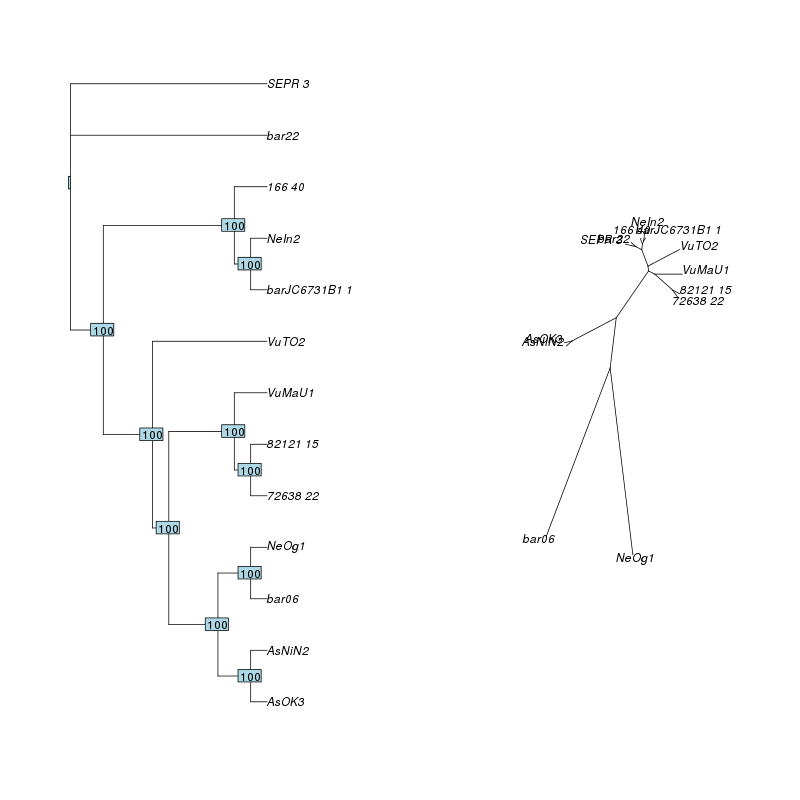

In [12]:
%%R -h 800 -w 800
library(ape)
tre <- read.tree("empirical_8/RAxML_bipartitions.empirical_8")
ltre <- ladderize(tre)

par(mfrow=c(1,2))
plot(ltre, use.edge.length=F)
nodelabels(ltre$node.label)

plot(ltre, type='u')

### Get phylo distances (GTRgamma dist)

In [13]:
%%R
mean(cophenetic.phylo(ltre))


[1] 0.05226094
